<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Mining-Project-Report:-Fraud-Detection-Model-Development" data-toc-modified-id="Data-Mining-Project-Report:-Fraud-Detection-Model-Development-0">Data Mining Project Report: Fraud Detection Model Development</a></span><ul class="toc-item"><li><span><a href="#Reflections-on-Preprocessing-Techniques" data-toc-modified-id="Reflections-on-Preprocessing-Techniques-0.1">Reflections on Preprocessing Techniques</a></span></li><li><span><a href="#Reflections-on-Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Reflections-on-Exploratory-Data-Analysis-(EDA)-0.2">Reflections on Exploratory Data Analysis (EDA)</a></span></li><li><span><a href="#Reflections-on-Feature-Engineering-Techniques" data-toc-modified-id="Reflections-on-Feature-Engineering-Techniques-0.3">Reflections on Feature Engineering Techniques</a></span></li><li><span><a href="#Reflections-on-Model-Selection-and-Hyperparameter-Tuning" data-toc-modified-id="Reflections-on-Model-Selection-and-Hyperparameter-Tuning-0.4">Reflections on Model Selection and Hyperparameter Tuning</a></span></li><li><span><a href="#Group's-Approach-to-Data-Mining-Task" data-toc-modified-id="Group's-Approach-to-Data-Mining-Task-0.5">Group's Approach to Data Mining Task</a></span></li><li><span><a href="#Potential-Feature-Improvements" data-toc-modified-id="Potential-Feature-Improvements-0.6">Potential Feature Improvements</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-0.7">Conclusion</a></span></li><li><span><a href="#References" data-toc-modified-id="References-0.8">References</a></span></li></ul></li><li><span><a href="#Data-Mangement-and-Mining---Group-Assessment" data-toc-modified-id="Data-Mangement-and-Mining---Group-Assessment-1">Data Mangement and Mining - Group Assessment</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Assessment-Instructions:-Analysing,-Processing,-and-Modeling-Financial-Transaction-Data" data-toc-modified-id="Assessment-Instructions:-Analysing,-Processing,-and-Modeling-Financial-Transaction-Data-1.0.1">Assessment Instructions: Analysing, Processing, and Modeling Financial Transaction Data</a></span></li><li><span><a href="#Assessment-Dataset" data-toc-modified-id="Assessment-Dataset-1.0.2">Assessment Dataset</a></span></li><li><span><a href="#Assessment-Template" data-toc-modified-id="Assessment-Template-1.0.3">Assessment Template</a></span></li><li><span><a href="#Assessment-Submission" data-toc-modified-id="Assessment-Submission-1.0.4">Assessment Submission</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1.0.4.1">Setup</a></span></li><li><span><a href="#Data-Loading" data-toc-modified-id="Data-Loading-1.0.4.2">Data Loading</a></span></li><li><span><a href="#Data-Profiling" data-toc-modified-id="Data-Profiling-1.0.4.3">Data Profiling</a></span></li><li><span><a href="#Data-Pre-Processing" data-toc-modified-id="Data-Pre-Processing-1.0.4.4">Data Pre-Processing</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-1.0.4.5">Feature Engineering</a></span></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-1.0.4.6">Modelling</a></span></li><li><span><a href="#Evaluating-different-models-and-feature-importances" data-toc-modified-id="Evaluating-different-models-and-feature-importances-1.0.4.7">Evaluating different models and feature importances</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-1.0.4.8">Feature Selection</a></span></li><li><span><a href="#Models-after-Feature-Selection" data-toc-modified-id="Models-after-Feature-Selection-1.0.4.9">Models after Feature Selection</a></span></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-1.0.4.10">Hyperparameter Tuning</a></span></li><li><span><a href="#Pickle-File-and-ROC-AUC-Curve" data-toc-modified-id="Pickle-File-and-ROC-AUC-Curve-1.0.4.11">Pickle File and ROC-AUC Curve</a></span></li></ul></li><li><span><a href="#Assessment-Evaluation" data-toc-modified-id="Assessment-Evaluation-1.0.5">Assessment Evaluation</a></span></li></ul></li></ul></li></ul></div>

#  Data Mining Project Report: Fraud Detection Model Development


## Reflections on Preprocessing Techniques

In this version of the project, we focused on improving the pre-processing techniques to address key challenges in handling fraud detection data. Changes were made to handle missing values for numeric columns by imputing the missing values with the **median**, and for categorical features, the **mode** was used. Additionally, basic garbage value removals were applied by not taking any **negative Transaction.Amount or Quantity** values. Additionally, temporal features like **Transaction.DayOfWeek** and **Transaction.Month** were derived from the **Transaction.Date** column.

## Reflections on Exploratory Data Analysis (EDA)

The process of exploratory data analysis (**EDA**) was crucial in guiding feature selection and engineering. Through **univariate** and **bivariate** analyses, we gained valuable insights into the distribution of our features and their relationships with the target variable. The interaction between **Quantity and Account Age** as well as **Amount and Quantity** were identified as potentially influential relationships, leading to the creation of additional features to represent these interactions. 

One of the standout observations during EDA was the identification of **transaction-related temporal features** that showed significant patterns of fraud. Both **Transaction.Month** and **Transaction.Hour** exhibited peaks during certain windows of time, reinforcing the notion that fraudulent activity tends to cluster in specific periods. As a result, these features were added to the final feature set, providing the model with valuable **time-based context**.

We also experimented with various transformations, including **Box-Cox, log transformations, and Z-score scaling**, in an attempt to reduce the skewness of the **Transaction.Amount** feature. However, while these transformations helped to some extent with normalizing the data, they did not lead to significant improvements in **model performance**. This highlighted an important learning: while transformations can help reduce skewness and improve model assumptions, they are not always the panacea and must be evaluated carefully in the context of the overall model.

The problem is sensitive as fraud detection involves high-stakes decisions. In our data, although the 99th percentile of transaction amount is **~900**, but over **98%** of transactions with amounts **≥2000** are fraudulent, requiring the retention of extreme values to capture critical fraud signals for modeling.


## Reflections on Feature Engineering Techniques

Feature engineering was another key aspect of our pre-processing approach. We created interaction features such as **Quantity/Account Age** and **Amount/Quantity**, aiming to capture the relationship between transaction amounts, account ages, and quantities. These features proved particularly useful as we observed that fraudulent activities **peaked during specific months and times of day**, highlighting the importance of temporal data in detecting fraud.

One of the most significant changes was the application of **SMOTE (Synthetic Minority Over-sampling Technique)** with a **80:20 sampling strategy**, where we oversampled the fraud class to **20%** of the dataset. This adjustment helped balance the class distribution effectively **without leading to overfitting**. A critical aspect of this adjustment was that it avoided the excessive oversampling that might have led to **model instability in V1**, allowing us to maintain a more balanced perspective on fraud detection. *(SMOTE: Synthetic Minority Over-sampling Technique by Nitesh V. Chawla et al. (2002))*

Additionally, we applied **one-hot encoding** to categorical features. This transformation converted categorical variables into numerical data by creating **binary columns** for each category, making the data compatible with machine learning models that require numerical input. **One-hot encoding** was particularly important in ensuring that we didn’t lose valuable information from categorical variables, which are often crucial in understanding fraud patterns.

We also evaluated various models by **analyzing feature importance percentages**, enabling us to identify the most relevant features for each model. This approach ensured **optimal feature selection** tailored to the specific requirements of different models.

## Reflections on Model Selection and Hyperparameter Tuning

The choice of model was driven by the need to handle the **class imbalance** in our dataset effectively while providing **high predictive accuracy**. We tested multiple models, including **Gradient Boosting, XGBoost, and LightGBM**. We tried tuning the models with a range of different parameters and methods like Randomized and Gridsearch. Finally, after having an optimal set of parameters we moved on to evaluating the performance of each model using the **F1 score**. **LightGBM emerged as the best performer**. The **F1 score** is particularly useful for imbalanced datasets like ours, as it balances **precision and recall**, offering a more meaningful evaluation of model performance than accuracy alone. **LightGBM** was chosen due to several advantages over the other models tested:

 **1. Training Speed and Efficiency**  
   **LightGBM** uses **histogram-based techniques** and a **leaf-wise growth strategy**, making it faster to train than traditional gradient boosting methods like **XGBoost**. This is particularly important for **large datasets**, where training time can become a bottleneck.

 **2. Memory Efficiency**  
   **LightGBM** is more **memory-efficient** than **XGBoost**, allowing it to handle **large and sparse datasets** more effectively. This is a crucial factor when working with **big data** in real-world applications, such as **fraud detection**.

 **3. Effective Management of Imbalanced Data**  
   Fraud detection datasets are often **imbalanced**, with fraudulent transactions being **rare**. **LightGBM** provides **mechanisms to handle such imbalances** effectively, enhancing the model's ability to **detect fraudulent activities**.

 **4. Native Handling of Categorical Features**  
   One of the key advantages of **LightGBM** over **XGBoost** is its ability to handle **categorical features directly**. **LightGBM** can natively process categorical data, **reducing the dimensionality** of the feature set and making the model more **memory-efficient** *(Chen & Guestrin, 2016; Data Overload, 2021)*.

These advantages made **LightGBM** the ideal choice for our **fraud detection model**, particularly when dealing with **large datasets** that require **fast training times and efficient memory usage**. Additionally, **LightGBM's** ability to handle **imbalanced data and categorical features natively** further strengthened its case as the **preferred model**.

## Group's Approach to Data Mining Task

Our approach to fraud detection focused on **addressing class imbalance, optimizing feature selection, and leveraging model strengths**. We applied **one-hot encoding** for categorical features, followed by **extensive EDA and feature engineering** to capture key **interactions and temporal patterns**. These features allowed the model to better understand the **patterns in fraudulent transactions**, especially in terms of the **time of day and transaction amount**. **SMOTE** was used to **balance the dataset while preventing overfitting**. Through **iterative refinement**, we experimented with **transformations and feature sets**, ensuring adaptability based on **data insights**. We focused on balancing **Recall and Precision** to get a decent **F1 score and AUC** to pick the **best model**

## Potential Feature Improvements

Looking forward, there are several opportunities for improving our model. One potential opportunity lies in the incorporation of **geographical data or customer behavioral history**. Adding **location-based features** or **transaction history** could further enhance the model’s ability to **detect anomalies** that are specific to certain **regions or customer patterns**. Additionally, **transaction frequency** could be another important feature to explore, as **frequent transactions** from the same account or device could be **indicative of fraudulent behavior**.

## Conclusion

In conclusion, we **changed the model from Gradient Boosting in V1 to LightGBM in V2** and achieved our best **F1 score of 58% on the test data**, an improvement from **46%** previously in **V1**.

## References
- **Chen, T., & Guestrin, C. (2016).** *XGBoost: A Scalable Tree Boosting System.* [Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining](https://arxiv.org/html/2406.04658v3).
- **Data Overload. (2021).** *Comparing XGBoost and LightGBM: A Comprehensive Analysis.* [Medium](https://medium.com/@data-overload/comparing-xgboost-and-lightgbm-a-comprehensive-analysis-9b80b7b0079b).
- **Chawla, Nitesh & Bowyer, Kevin & Hall, Lawrence & Kegelmeyer, W.. (2002).** *SMOTE: Synthetic Minority Over-sampling Technique.* J. Artif. Intell. Res. (JAIR). **16**. 321-357. 10.1613/jair.953.


# Data Mangement and Mining - Group Assessment 

### Assessment Instructions: Analysing, Processing, and Modeling Financial Transaction Data

Your team has been given access to a dataset containing financial transaction data. Your goal is to analyze, process, and model this data to identify patterns, trends, and potential fraud.Once completed you will need to submit this notebook and an accompanying model file for assessment (See Assessment Brief Section 2 Part 1). Once an initial submission has been made groups should focus on improving the model and the analysis, then resubmit the updated notebook and model file (See Assessment Brief section 2 Part 2). The final submission should also include a short reflective summary, outlining the changes made and the reasons for these changes (See assessment brief Section 2 Part 2).

### Assessment Dataset

The dataset provided for the assessment contains a sample of financial transactions, made by customers. The features of the dataset are described below, they mainly include information about the transaction and the customer involved in the transaction. The dataset also contains a binary target variable called 'Is.Fraudulent', which indicates whether the transaction is fraudulent or not. The goal of the assessment is to build a model that can predict whether a transaction is fraudulent or not based on the features provided in the dataset and any additional features that you may create. 


The dataset provided for the assessment contains a sample of financial transactions, made by customers. The features of the dataset are described below.

| Variable            | Data Type  | Description |
|---------------------|-----------|-------------|
| Transaction.Date    | object    | The date of the transaction. |
| Transaction.Amount  | float64   | The amount of money involved. |
| Customer.Age       | int64     | The age of the customer. |
| Account.Age.Days   | int64     | The number of days since opened. |
| Transaction.Hour   | int64     | The hour of day during transaction. |
| source            | object    | The source of the transaction. |
| browser          | object    | The browser used for transaction. |
| Payment.Method    | object    | The payment method used. |
| Product.Category  | object    | The category of product purchased. |
| Quantity         | int64     | The number of units purchased. |
| Device.Used      | object    | The device used to make transaction. |
| Is.Fraudulent    | int64     | A flag indicating fraudulent status. |

### Assessment Template 

The template provided below is a guide to help you structure your analysis. You can add additional code and text cells to the template as needed. There are cells and code throughout the template which you should not modify, these are required to ensure the assessment can be marked successfully. The cells or code you should not modify will be clearly labeled. Please ensure you save a copy of the template to your local machine before you start your analysis.

### Assessment Submission

#### Setup

In [1]:

import time
from datetime import datetime, timedelta
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
# Display settings  
%matplotlib inline  
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  

# Scikit-learn modules  
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  
from sklearn.metrics import (classification_report, accuracy_score, precision_score,  
                             recall_score, f1_score, roc_auc_score, roc_curve)  

# Machine learning models  
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  
from xgboost import XGBClassifier  
from lightgbm import LGBMClassifier  
from scipy import stats
from sklearn.metrics import roc_curve, auc

# Imbalanced data handling  
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# Utilities  
import pickle  
import warnings  
import random

# Suppress warnings  
warnings.filterwarnings("ignore", category=DeprecationWarning)  
warnings.filterwarnings("ignore", category=FutureWarning)  
warnings.filterwarnings("ignore", category=UserWarning)  



#### Data Loading

In [2]:

# load the data
df = pd.read_csv('student_dataset.csv')

# print the first 5 rows of the data
df.head()


,Transaction.Date,Transaction.Amount,Customer.Age,Account.Age.Days,Transaction.Hour,source,browser,Payment.Method,Product.Category,Quantity,Device.Used,Is.Fraudulent
0,2015-05-28 11:15:16,45.00,37,35,11,Ads,Chrome,PayPal,electronics,5,tablet,0
1,2015-04-03 03:39:44,15.00,33,44,3,Direct,FireFox,debit card,health & beauty,5,tablet,1
2,2015-08-31 23:01:21,54.00,19,44,23,SEO,Opera,debit card,health & beauty,1,mobile,0
3,2024-03-10 17:02:40,234.42,23,107,17,Ads,Chrome,bank transfer,electronics,5,tablet,0
4,2024-03-30 08:15:29,412.49,23,220,8,Ads,Safari,bank transfer,toys & games,4,mobile,0


#### Data Profiling

In [3]:
df.shape

(240000, 12)

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction.Date    240000 non-null  object 
 1   Transaction.Amount  240000 non-null  float64
 2   Customer.Age        240000 non-null  int64  
 3   Account.Age.Days    240000 non-null  int64  
 4   Transaction.Hour    240000 non-null  int64  
 5   source              240000 non-null  object 
 6   browser             240000 non-null  object 
 7   Payment.Method      240000 non-null  object 
 8   Product.Category    240000 non-null  object 
 9   Quantity            240000 non-null  int64  
 10  Device.Used         240000 non-null  object 
 11  Is.Fraudulent       240000 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 22.0+ MB
None


In [5]:
# Descriptive statistics of the data set
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

,Transaction.Amount,Customer.Age,Account.Age.Days,Transaction.Hour,Quantity,Is.Fraudulent
count,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000
mean,132.143547,33.834617,117.843075,11.414671,3.005296,0.072008
std,213.518929,9.393592,100.604279,6.947764,1.415310,0.258502
min,9.000000,-8.000000,0.000000,0.000000,1.000000,0.000000
5%,14.000000,19.000000,4.000000,1.000000,1.000000,0.000000
25%,30.000000,27.000000,40.000000,5.000000,2.000000,0.000000
50%,53.000000,33.000000,87.000000,11.000000,3.000000,0.000000
75%,152.740000,40.000000,178.000000,17.000000,4.000000,0.000000
90%,344.394000,46.000000,291.000000,21.000000,5.000000,0.000000
95%,495.960500,50.000000,328.000000,22.000000,5.000000,1.000000


#### Data Pre-Processing

##### Missing Values

In [6]:
print(df.isnull().sum())  # Count missing values per column
print(df['Is.Fraudulent'].value_counts())  # Check class distribution


Transaction.Date      0
Transaction.Amount    0
Customer.Age          0
Account.Age.Days      0
Transaction.Hour      0
source                0
browser               0
Payment.Method        0
Product.Category      0
Quantity              0
Device.Used           0
Is.Fraudulent         0
dtype: int64
Is.Fraudulent
0    222718
1     17282
Name: count, dtype: int64


##### Missing Value Treatment

In [7]:

## Missing Value Treatment
# For numeric columns, impute missing values with the median; for categorical, use the mode.for col in df.columns:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype.name in ['float64', 'int64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

##### Garbage Value Treatment

In [8]:
df = df[df['Transaction.Amount'] >= 0] # no negative amounts possible
df = df[df['Customer.Age'].between(1, 100)]  # Assuming valid ages are 1-100
df = df[df['Quantity'] > 0]  # Ensure quantity is positive

In [9]:
#data after treatment
df.shape

(239960, 12)

In [10]:
#Descriptive statistics after treatment
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

,Transaction.Amount,Customer.Age,Account.Age.Days,Transaction.Hour,Quantity,Is.Fraudulent
count,239960.000000,239960.000000,239960.000000,239960.000000,239960.000000,239960.000000
mean,132.123592,33.840503,117.833201,11.414282,3.005322,0.072012
std,213.506379,9.383271,100.601503,6.947731,1.415307,0.258508
min,9.000000,1.000000,0.000000,0.000000,1.000000,0.000000
5%,14.000000,19.000000,4.000000,1.000000,1.000000,0.000000
25%,30.000000,27.000000,40.000000,5.000000,2.000000,0.000000
50%,53.000000,33.000000,87.000000,11.000000,3.000000,0.000000
75%,152.710000,40.000000,178.000000,17.000000,4.000000,0.000000
90%,344.321000,46.000000,291.000000,21.000000,5.000000,0.000000
95%,495.930000,50.000000,328.000000,22.000000,5.000000,1.000000


##### Outlier detection

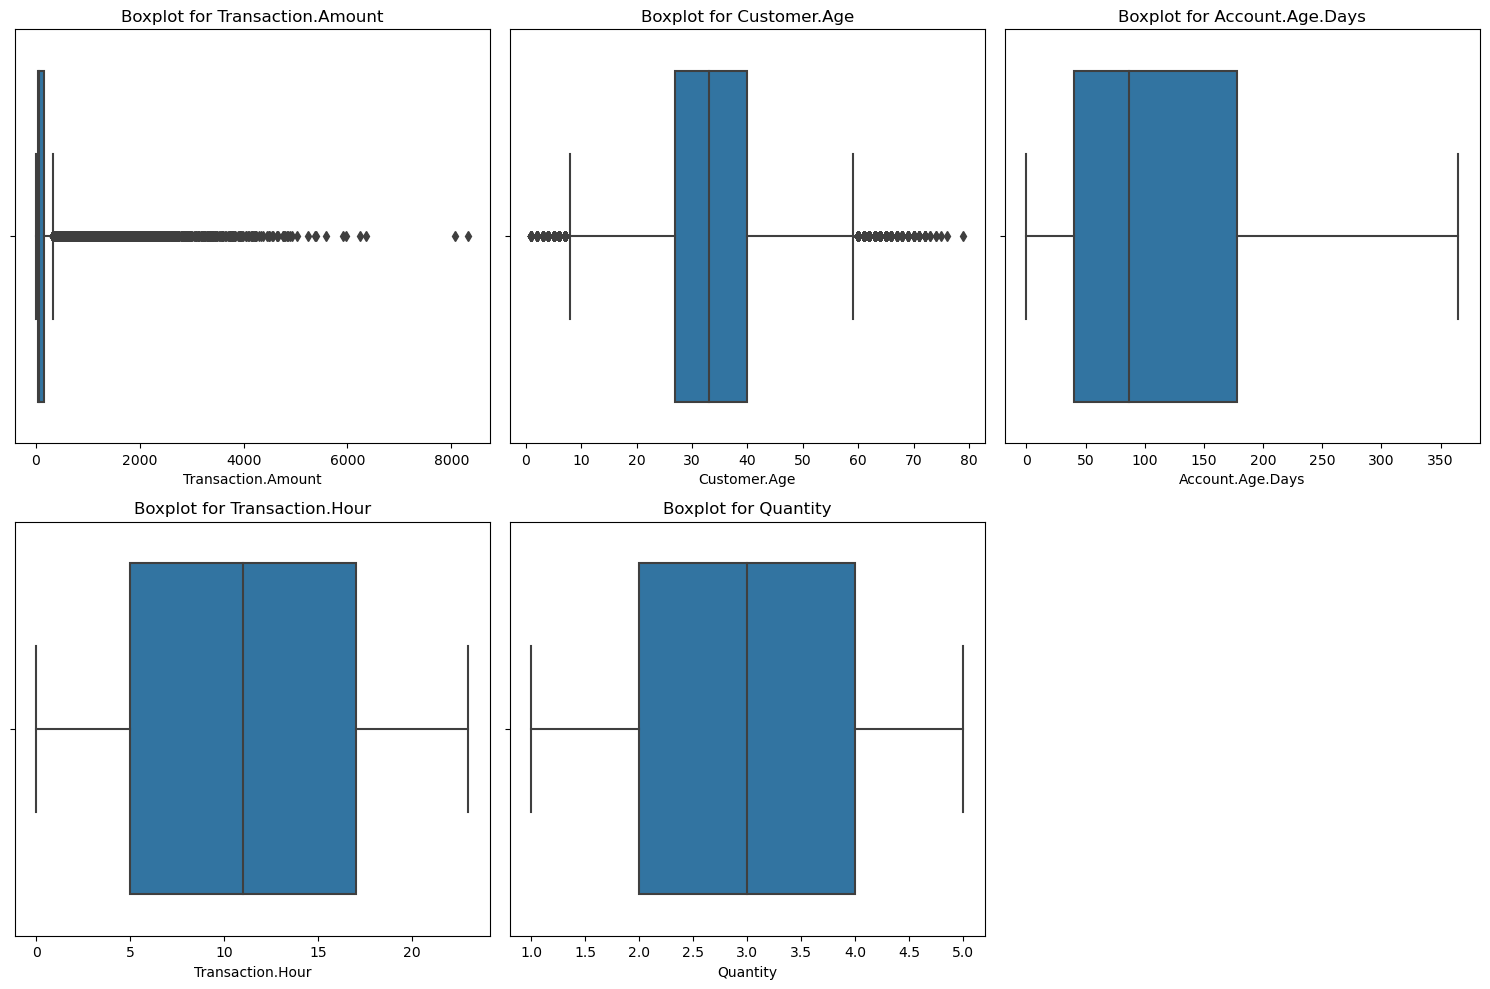

In [11]:
# Define numerical columns
numerical_columns = ['Transaction.Amount', 'Customer.Age', 'Account.Age.Days', 'Transaction.Hour', 'Quantity']

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    
plt.tight_layout()
plt.show()

In [12]:
df.shape

(239960, 12)

#### Feature Engineering

In [13]:
#converting Date to proper datetime format
df['Transaction.Date'] = pd.to_datetime(df['Transaction.Date'], errors='coerce', format='mixed')
df.head()

,Transaction.Date,Transaction.Amount,Customer.Age,Account.Age.Days,Transaction.Hour,source,browser,Payment.Method,Product.Category,Quantity,Device.Used,Is.Fraudulent
0,2015-05-28 11:15:16,45.00,37,35,11,Ads,Chrome,PayPal,electronics,5,tablet,0
1,2015-04-03 03:39:44,15.00,33,44,3,Direct,FireFox,debit card,health & beauty,5,tablet,1
2,2015-08-31 23:01:21,54.00,19,44,23,SEO,Opera,debit card,health & beauty,1,mobile,0
3,2024-03-10 17:02:40,234.42,23,107,17,Ads,Chrome,bank transfer,electronics,5,tablet,0
4,2024-03-30 08:15:29,412.49,23,220,8,Ads,Safari,bank transfer,toys & games,4,mobile,0


##### New Features and EDA

In [14]:
# Extracting date-related features
df['Transaction.Date'] = pd.to_datetime(df['Transaction.Date'])
df['Transaction.DayOfWeek'] = df['Transaction.Date'].dt.dayofweek
df['Transaction.Month'] = df['Transaction.Date'].dt.month


In [15]:
df.head()

,Transaction.Date,Transaction.Amount,Customer.Age,Account.Age.Days,Transaction.Hour,source,browser,Payment.Method,Product.Category,Quantity,Device.Used,Is.Fraudulent,Transaction.DayOfWeek,Transaction.Month
0,2015-05-28 11:15:16,45.00,37,35,11,Ads,Chrome,PayPal,electronics,5,tablet,0,3,5
1,2015-04-03 03:39:44,15.00,33,44,3,Direct,FireFox,debit card,health & beauty,5,tablet,1,4,4
2,2015-08-31 23:01:21,54.00,19,44,23,SEO,Opera,debit card,health & beauty,1,mobile,0,0,8
3,2024-03-10 17:02:40,234.42,23,107,17,Ads,Chrome,bank transfer,electronics,5,tablet,0,6,3
4,2024-03-30 08:15:29,412.49,23,220,8,Ads,Safari,bank transfer,toys & games,4,mobile,0,5,3


In [16]:
#Day wise Fraud trends
df.groupby('Transaction.DayOfWeek').agg(
    Fraudulent_Count=('Is.Fraudulent', 'sum'),
    Total_Count=('Is.Fraudulent', 'count')
).reset_index().assign(
    Fraudulent_Percentage=lambda x: (x['Fraudulent_Count'] / x['Total_Count']) * 100
)


,Transaction.DayOfWeek,Fraudulent_Count,Total_Count,Fraudulent_Percentage
0,0,2572,35040,7.340183
1,1,2262,34746,6.510102
2,2,2234,33970,6.576391
3,3,2456,33791,7.268208
4,4,2585,33880,7.629870
5,5,2495,33943,7.350558
6,6,2676,34590,7.736340


In [17]:
#Hour wise Fraud trends
df.groupby('Transaction.Hour').agg(
    Fraudulent_Count=('Is.Fraudulent', 'sum'),
    Total_Count=('Is.Fraudulent', 'count')
).reset_index().assign(
    Fraudulent_Percentage=lambda x: (x['Fraudulent_Count'] / x['Total_Count']) * 100
)


,Transaction.Hour,Fraudulent_Count,Total_Count,Fraudulent_Percentage
0,0,976,10185,9.582720
1,1,1006,10221,9.842481
2,2,1041,10503,9.911454
3,3,1054,10516,10.022822
4,4,971,10119,9.595810
5,5,1004,10203,9.840243
6,6,626,9993,6.264385
7,7,568,9701,5.855066
8,8,667,10031,6.649387
9,9,683,9875,6.916456


**Finding: Hours 0-5 have relatively higher fraud percentage**

In [18]:
# Calculate fraud rate per hour
fraud_rates = df.groupby('Transaction.Hour')['Is.Fraudulent'].mean()

# Use the 75th percentile as the high-risk cutoff
high_risk_threshold = fraud_rates.quantile(0.75)

# Generate High_Risk_Hour flag based on fraud rate being in the top 25% of all hours
df['High_Risk_Hour'] = df['Transaction.Hour'].map(lambda x: 1 if fraud_rates[x] > high_risk_threshold else 0)
df.groupby('Transaction.Hour')['High_Risk_Hour'].max()

Transaction.Hour
0     1
1     1
2     1
3     1
4     1
5     1
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
Name: High_Risk_Hour, dtype: int64

In [19]:
#Month wise Fraud trends
df.groupby('Transaction.Month').agg(
    Fraudulent_Count=('Is.Fraudulent', 'sum'),
    Total_Count=('Is.Fraudulent', 'count')
).reset_index().assign(
    Fraudulent_Percentage=lambda x: (x['Fraudulent_Count'] / x['Total_Count']) * 100
)



,Transaction.Month,Fraudulent_Count,Total_Count,Fraudulent_Percentage
0,1,8153,47859,17.035458
1,2,2144,42867,5.001516
2,3,2433,49135,4.951664
3,4,705,16066,4.388149
4,5,724,15330,4.722766
5,6,659,14837,4.441599
6,7,717,15526,4.618060
7,8,668,14896,4.484425
8,9,515,11379,4.525881
9,10,362,7826,4.625607


**Finding: 1st Month has a seasonal peak fraud percentage, followed by the last month**

In [20]:
# Calculate fraud rate per month
month_fraud_rates = df.groupby('Transaction.Month')['Is.Fraudulent'].mean()

##Define high-risk threshold (e.g., top 25% fraud-heavy months)
high_risk_threshold = month_fraud_rates.quantile(0.75)
# Generate High_Risk_Month flag based on fraud rate being in the top 25% of all months

df['High_Risk_Month'] = df['Transaction.Month'].map(lambda x: 1 if month_fraud_rates[x] > high_risk_threshold else 0)
df.groupby('Transaction.Month')['High_Risk_Month'].max()

Transaction.Month
1     1
2     1
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    1
Name: High_Risk_Month, dtype: int64

In [21]:
#Exploring interaction of Transaction Month with Transaction Hour column 
df.groupby(['Transaction.Month', 'Transaction.Hour']).agg(
    {'Is.Fraudulent': ['sum', 'count']}
).assign(
    fraud_rate=lambda x: x[('Is.Fraudulent', 'sum')] / x[('Is.Fraudulent', 'count')])


Is.Fraudulent       fraud_rate
                                             sum count           
Transaction.Month Transaction.Hour                               
1                 0                          405  2026   0.199901
                  1                          402  1955   0.205627
                  2                          466  2113   0.220540
                  3                          469  2157   0.217432
                  4                          364  1989   0.183007
                  5                          426  2055   0.207299
                  6                          295  1979   0.149065
                  7                          250  1877   0.133191
                  8                          349  2012   0.173459
                  9                          400  2031   0.196947
                  10                         346  1986   0.174220
                  11                         268  1966   0.136317
                  12                         313  2033   0.153960
                  13                         274  1946   0.140802
                  14                         344  2025   0.169877
                  15                         321  1996   0.160822
                  16                         308  1950   0.157949
                  17                         398  2058   0.193392
                  18                         316  1981   0.159515
                  19                         335  1969   0.170137
                  20                         225  1871   0.120257
                  21                         292  1937   0.150749
                  22                         275  1955   0.140665
                  23                         312  1992   0.156627
2                 0                          178  1913   0.093048
                  1                          183  1852   0.098812
                  2                          169  1913   0.088343
                  3                          185  1928   0.095954
                  4                          203  1884   0.107749
                  5                          192  1897   0.101212
                  6                           67  1777   0.037704
                  7                           50  1719   0.029087
                  8                           61  1764   0.034580
                  9                           45  1693   0.026580
                  10                          53  1731   0.030618
                  11                          61  1725   0.035362
                  12                          52  1806   0.028793
                  13                          63  1706   0.036928
                  14                          64  1783   0.035895
                  15                          71  1733   0.040969
                  16                          60  1686   0.035587
                  17                          57  1785   0.031933
                  18                          73  1786   0.040873
                  19                          53  1733   0.030583
                  20                          48  1796   0.026726
                  21                          48  1754   0.027366
                  22                          60  1748   0.034325
                  23                          48  1755   0.027350
3                 0                          205  2105   0.097387
                  1                          210  2199   0.095498
                  2                          212  2192   0.096715
                  3                          205  2207   0.092886
                  4                          190  2109   0.090090
                  5                          183  2095   0.087351
                  6                           65  1989   0.032680
                  7                           68  1967   0.034570
                  8                           65  2065   0.031477
                  9                           62  1953   0.031746
         

**Finding: Early hours (0-5) in the 1st Month have a peak fraud percentage of ~20%**

##### Transformations

In [22]:

# Compute original skew
original_skew = df['Transaction.Amount'].skew()

# Log Transformation (Adding 1 to avoid log(0) issues)
df['Transaction.Amount.Log'] = np.log1p(df['Transaction.Amount'])
log_skew = df['Transaction.Amount.Log'].skew()

# Box-Cox Transformation (Only works on positive values)
df['Transaction.Amount.BoxCox'], lambda_val = stats.boxcox(df['Transaction.Amount'])
boxcox_skew = df['Transaction.Amount.BoxCox'].skew()

# Z-score Standardization
zscore_scaler = StandardScaler()
df['Transaction.Amount.Zscore'] = zscore_scaler.fit_transform(df[['Transaction.Amount']])
zscore_skew = df['Transaction.Amount.Zscore'].skew()

# Min-Max Scaling (0 to 1)
minmax_scaler = MinMaxScaler()
df['Transaction.Amount.MinMax'] = minmax_scaler.fit_transform(df[['Transaction.Amount']])
minmax_skew = df['Transaction.Amount.MinMax'].skew()

# Standardization (Mean 0, Std 1)
std_scaler = StandardScaler()
df['Transaction.Amount.Std'] = std_scaler.fit_transform(df[['Transaction.Amount']])
std_skew = df['Transaction.Amount.Std'].skew()

# Display skewness values
skew_values = {
    "Original": original_skew,
    "Log": log_skew,
    "Box-Cox": boxcox_skew,
    "Z-score": zscore_skew,
    "Min-Max": minmax_skew,
    "Standardized": std_skew
}

print("Skewness values after transformations:", skew_values)
print("Lambda value used in Box-Cox:", lambda_val)

# Display transformed DataFrame
print(df)


Skewness values after transformations: {'Original': 6.68154347473234, 'Log': 0.5453151718544184, 'Box-Cox': 0.060863019226832314, 'Z-score': 6.6815434747323375, 'Min-Max': 6.681543474732341, 'Standardized': 6.6815434747323375}
Lambda value used in Box-Cox: -0.21482552776162872


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



**Boxcox reduces skew from 6 to 0.06, standardizing data the most**

In [23]:
# Exploring a new interaction feature: Transaction Amount / Customer Age
df['Txn_Amount_Per_Customer_Age'] = df['Transaction.Amount'] / (df['Customer.Age'] + 1)  # Add 1 to avoid division by 0

# Profiling the feature for fraudulent (1) and non-fraudulent (0) transactions
fraud_profile = df[df['Is.Fraudulent'] == 1]['Txn_Amount_Per_Customer_Age'].describe()
non_fraud_profile = df[df['Is.Fraudulent'] == 0]['Txn_Amount_Per_Customer_Age'].describe()

print("Fraudulent Transactions (1) Profile:")
print(fraud_profile)
print("\nNon-Fraudulent Transactions (0) Profile:")
print(non_fraud_profile)


Fraudulent Transactions (1) Profile:
count    17280.000000
mean         6.694115
std         17.229205
min          0.153846
25%          0.800000
50%          1.388889
75%          3.642869
max        396.291667
Name: Txn_Amount_Per_Customer_Age, dtype: float64

Non-Fraudulent Transactions (0) Profile:
count    222680.000000
mean          3.941906
std           6.087959
min           0.134328
25%           0.884615
50%           1.652174
75%           4.471947
max         306.035000
Name: Txn_Amount_Per_Customer_Age, dtype: float64


**No major findings because of high skewness in fraudulent transaction amounts**

Amount per Item Statistics by Fraud Status:
                  count       mean         std  min   25%     50%        75%  \
Is.Fraudulent                                                                  
0              222680.0  57.299037   97.651642  1.8  10.2  22.441  60.000000   
1               17280.0  98.252398  292.773061  1.8   9.0  18.005  55.296875   

                   max  
Is.Fraudulent           
0              1865.44  
1              8329.90  


Text(0, 0.5, 'Amount per Item (log scale)')

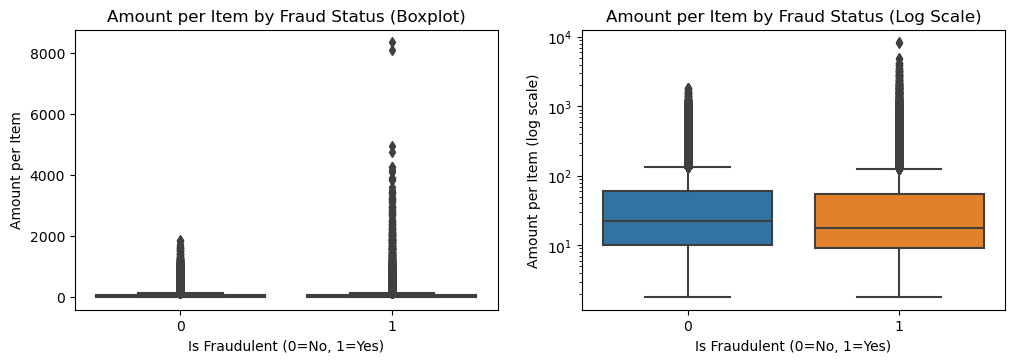

In [24]:

# Exploring a new interaction feature: Transaction Amount / Quantity
df['Amount_per_Item'] = df['Transaction.Amount'] / df['Quantity']

# Summary statistics by fraud status
ratio_by_fraud = df.groupby('Is.Fraudulent')['Amount_per_Item'].describe()
print("Amount per Item Statistics by Fraud Status:")
print(ratio_by_fraud)

# Visualize the distributions
plt.figure(figsize=(12, 8))

# Boxplot to compare distributions
plt.subplot(2, 2, 1)
sns.boxplot(x='Is.Fraudulent', y='Amount_per_Item', data=df)
plt.title('Amount per Item by Fraud Status (Boxplot)')
plt.xlabel('Is Fraudulent (0=No, 1=Yes)')
plt.ylabel('Amount per Item')

# Same boxplot with log scale for better visibility
plt.subplot(2, 2, 2)
sns.boxplot(x='Is.Fraudulent', y='Amount_per_Item', data=df)
plt.yscale('log')
plt.title('Amount per Item by Fraud Status (Log Scale)')
plt.xlabel('Is Fraudulent (0=No, 1=Yes)')
plt.ylabel('Amount per Item (log scale)')


**No major changes findings w.r.t quantity because of high skewness in fraudulent transaction amounts**

##### One-Hot Encoding Categorical columns

In [25]:
categorical_cols = ['source', 'browser', 'Payment.Method', 'Product.Category', 'Device.Used']## Encoding: One-hot encode the categorical variables
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.columns = df.columns.str.replace(" ", "_")  # Standardize column names

print('Data shape after encoding:', df.shape)

Data shape after encoding: (239960, 33)


In [26]:
#checking flags 
df.head()

,Transaction.Date,Transaction.Amount,Customer.Age,Account.Age.Days,Transaction.Hour,Quantity,Is.Fraudulent,Transaction.DayOfWeek,Transaction.Month,High_Risk_Hour,High_Risk_Month,Transaction.Amount.Log,Transaction.Amount.BoxCox,Transaction.Amount.Zscore,Transaction.Amount.MinMax,Transaction.Amount.Std,Txn_Amount_Per_Customer_Age,Amount_per_Item,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,Payment.Method_bank_transfer,Payment.Method_credit_card,Payment.Method_debit_card,Product.Category_electronics,Product.Category_health_&_beauty,Product.Category_home_&_garden,Product.Category_toys_&_games,Device.Used_mobile,Device.Used_tablet
0,2015-05-28 11:15:16,45.00,37,35,11,5,0,3,5,0,0,3.828641,2.600177,-0.408062,0.004326,-0.408062,1.184211,9.0000,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
1,2015-04-03 03:39:44,15.00,33,44,3,5,1,4,4,1,0,2.772589,2.053225,-0.548573,0.000721,-0.548573,0.441176,3.0000,True,False,True,False,False,False,False,False,True,False,True,False,False,False,True
2,2015-08-31 23:01:21,54.00,19,44,23,1,0,0,8,0,0,4.007333,2.679101,-0.365908,0.005408,-0.365908,2.700000,54.0000,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False
3,2024-03-10 17:02:40,234.42,23,107,17,5,0,6,3,0,0,5.461371,3.213559,0.479127,0.027091,0.479127,9.767500,46.8840,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True
4,2024-03-30 08:15:29,412.49,23,220,8,4,0,5,3,0,0,6.024633,3.378335,1.313155,0.048491,1.313155,17.187083,103.1225,False,False,False,False,False,True,True,False,False,False,False,False,True,True,False


In [27]:
#maintaining consistency across column names 
df.columns = df.columns.str.strip()  # Trim leading/trailing spaces
df.columns = df.columns.str.lower()  # Convert column names to lowercase
df.columns = df.columns.str.replace(" ", "_")  # Replace spaces with underscores


#### Modelling

##### Handling Class Imbalance Using Smote

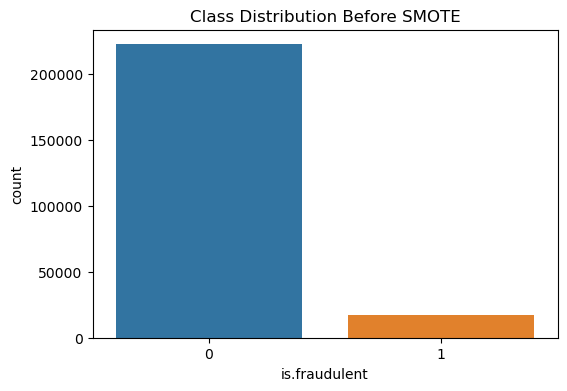

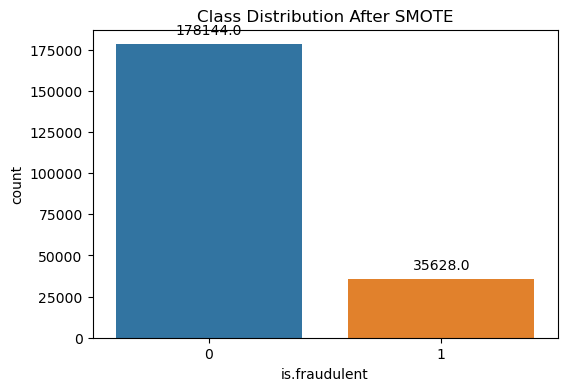

In [28]:
## Visualize class distribution before SMOTE
plt.figure(figsize=(6,4))
ax = sns.countplot(x='is.fraudulent', data=df)
plt.title('Class Distribution Before SMOTE')

# Define X and y
X = df.drop(columns=['transaction.date','is.fraudulent'])
y = df['is.fraudulent']

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# SMOTE with a fixed sampling_strategy ratio generates synthetic samples, making the minority class x% of the majority class to balance the dataset
#tried 10-40 % and found 20% to be the optimal ratio

smote = SMOTE(sampling_strategy=0.2, random_state=42)  # Minority will be 20% of majority
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Visualize class distribution after SMOTE
plt.figure(figsize=(6,4))
ax = sns.countplot(x=y_train_res)
plt.title('Class Distribution After SMOTE')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


#### Evaluating different models and feature importances

In [29]:
#model performances and feature importances for all models 
start_time = time.time()

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
}

# Dictionary to store evaluation metrics
results = {}
feature_importance = {}

for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }
    
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print('-'*40)

# Display evaluation results
results_df = pd.DataFrame(results).T
print("Evaluation Metrics:")
print(results_df)

# Dictionary to store feature importances
feature_importance = {}

# Extract feature importance for models that support it
for name, model in models.items():
    if hasattr(model, "feature_importances_"):  # Check if the model has feature_importances_
        feature_importance[name] = model.feature_importances_

# Convert to DataFrame
if feature_importance:
    feature_importance_df = pd.DataFrame(feature_importance, index=X_train.columns)
    
    # Convert to percentage
    feature_importance_percent_df = feature_importance_df.div(feature_importance_df.sum(axis=0), axis=1) * 100
    feature_importance_percent_df = feature_importance_percent_df.sort_values(by=feature_importance_percent_df.columns.tolist(), ascending=False)
    print("\nFeature Importance (Percentage) Table:")
    print(feature_importance_percent_df)
    
    
end_time = time.time()

execution_time = end_time - start_time
print(f"Execution time: {execution_time:.4f} seconds")


Model: LogisticRegression
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     44536
           1       0.46      0.18      0.25      3456

    accuracy                           0.93     47992
   macro avg       0.70      0.58      0.61     47992
weighted avg       0.90      0.93      0.91     47992

----------------------------------------
Model: KNN
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     44536
           1       0.40      0.48      0.44      3456

    accuracy                           0.91     47992
   macro avg       0.68      0.71      0.69     47992
weighted avg       0.92      0.91      0.91     47992

----------------------------------------
Model: DecisionTree
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     44536
           1       0.36      0.47      0.41      3456

    accuracy                           0.90

##### Feature Selection Justification

The selected features are based on feature importance scores from our best-performing models, **XGBoost** and **LightGBM**, alongside their business relevance:

- **'account.age.days'** has a high importance of 8.91% (XGBoost) and is crucial for understanding user behavior and trust, making it a key feature for fraud detection.
- **'high_risk_month** and **'high_risk_hour'** were explored but did not contribute significantly to model performance. Temporal patterns were considered, but the flags did not improve results.Raw features are working better.
- **'device.used_mobile'** (7.79% importance in XGBoost) and **'device.used_tablet'** (2.83% in XGBoost) reflect device-related behaviors that are important for detecting fraud linked to device usage.
- **'payment.method_*'** (e.g., 'Payment.Method_credit card' with 9.75% importance in XGBoost) and **'product.category_*'** (e.g., 'Product.Category_health & beauty' with 6.55% in XGBoost) are key transaction features that reveal fraud patterns based on payment methods and product categories.
- **'source_*'** (e.g., 'source_SEO' with 5.50% importance) and **'browser_*'** (e.g., 'browser_IE' with 2.10% importance) provide important business context on how the transaction was initiated, helping to identify suspicious access channels.

These features were selected for their strong importance in **XGBoost** and **LightGBM**, which we consider our best models for fraud detection. Also they add possible predictability from a business standpoint

##### Exclusion of Interaction Features and Transformations

Interaction features and transformations (Box-Cox, Log, Zscore) were tested but did not lead to significant improvements:
- **'txn_amount_per_customer_age'** and **'amount_per_item'** showed low importance and did not contribute to improving model performance.
- Transformations such as **Box-Cox** (0.56% in LightGBM), **Log** (0.76% in LightGBM), and **Zscore** (2.96% in LightGBM) had minimal impact, confirming that raw features performed better.

As a result, these features and transformations were excluded from the final model to simplify the approach and focus on the most impactful predictors.


#### Feature Selection

In [30]:
# Select important features based on various models' feature importance
selected_features = [
    'account.age.days',
    'transaction.amount',
    'transaction.month',
    'transaction.hour',
    'device.used_mobile',
    'device.used_tablet',
    'payment.method_credit_card',
    'payment.method_debit_card',
    'payment.method_bank_transfer',
    'product.category_electronics',
    'product.category_health_&_beauty',
    'product.category_home_&_garden',
    'product.category_toys_&_games',
    'source_direct',
    'source_seo',
    'browser_ie',
    'browser_firefox',
    'browser_safari',
    'browser_opera'
]


# Keep only these selected features (including log-transformed ones)
X_train_selected = X_train_res[selected_features]
X_test_selected = X_test[selected_features]

# Print the selected features
print("Selected Features:", selected_features)


Selected Features: ['account.age.days', 'transaction.amount', 'transaction.month', 'transaction.hour', 'device.used_mobile', 'device.used_tablet', 'payment.method_credit_card', 'payment.method_debit_card', 'payment.method_bank_transfer', 'product.category_electronics', 'product.category_health_&_beauty', 'product.category_home_&_garden', 'product.category_toys_&_games', 'source_direct', 'source_seo', 'browser_ie', 'browser_firefox', 'browser_safari', 'browser_opera']


In [31]:
X_train_selected.head()

,account.age.days,transaction.amount,transaction.month,transaction.hour,device.used_mobile,device.used_tablet,payment.method_credit_card,payment.method_debit_card,payment.method_bank_transfer,product.category_electronics,product.category_health_&_beauty,product.category_home_&_garden,product.category_toys_&_games,source_direct,source_seo,browser_ie,browser_firefox,browser_safari,browser_opera
0,18,378.09,3,0,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False
1,59,50.00,6,21,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False
2,232,54.71,2,5,True,False,True,False,False,False,True,False,False,False,True,False,True,False,False
3,296,151.54,2,13,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False
4,46,39.00,2,16,False,True,False,False,True,True,False,False,False,True,False,True,False,False,False


#### Models after Feature Selection

In [32]:
  
start_time = time.time()

# Train models on selected features

for name, model in models.items():
    model.fit(X_train_selected, y_train_res)
    y_pred = model.predict(X_test_selected)
    
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }
    
# Show results
results_df = pd.DataFrame(results).T
print("\n Evaluation Metrics After Feature Selection:")
print(results_df)

   
end_time = time.time()

execution_time = end_time - start_time
print(f"Execution time: {execution_time:.4f} seconds")


[LightGBM] [Info] Number of positive: 35628, number of negative: 178144
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 575
[LightGBM] [Info] Number of data points in the train set: 213772, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166664 -> initscore=-1.609460
[LightGBM] [Info] Start training from score -1.609460

 Evaluation Metrics After Feature Selection:
                    Accuracy  Precision    Recall  F1 Score
LogisticRegression  0.923946   0.410846  0.129340  0.196743
KNN                 0.933593   0.544998  0.471354  0.505508
DecisionTree        0.900796   0.357812  0.475116  0.408204
RandomForest        0.955180   0.901538  0.423900  0.576658
XGBoost             0.955638   0.909821  0.426215  0.580493
LightGBM            0.955826   0.92

#### Hyperparameter Tuning

In [33]:
start_time = time.time()
# parameter grids for hyperparameter tuning, picking best 3 models based on latest f1 scores

param_grids = {
    'GradientBoosting': {
        'n_estimators': [100, 150, 200],  
        'learning_rate': [0.01, 0.03, 0.05],  
        'max_depth': [3, 5, 7]  
    },
    'XGBoost': {
        'n_estimators': [100, 150, 200],  
        'learning_rate': [0.01, 0.03, 0.05],  # More granularity
        'max_depth': [3, 5, 7],  #  depth options
    },
    'LightGBM': {
        'n_estimators': [100, 150, 200],  
        'learning_rate': [0.01, 0.03, 0.05],  
        'num_leaves': [31, 50] 
    }
}

tuned_results = {}
best_models = {}

for name, model in models.items():
    if name in param_grids:
        grid = GridSearchCV(model, param_grids[name], scoring='f1', cv=5, n_jobs=-1)
        grid.fit(X_train_selected, y_train_res)
        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test_selected)
        f1 = f1_score(y_test, y_pred)
        tuned_results[name] = f1
        best_models[name] = best_model
        print(f"Tuned {name} F1 Score: {f1:.4f}")

# Identify best model based on F1 Score
best_model_name = max(tuned_results, key=tuned_results.get)
print(f"\nBest model based on F1 Score: {best_model_name} with F1 Score: {tuned_results[best_model_name]:.4f}")

  
end_time = time.time()

execution_time = end_time - start_time
print(f"Execution time: {execution_time:.4f} seconds")


Tuned XGBoost F1 Score: 0.5791
[LightGBM] [Info] Number of positive: 35628, number of negative: 178144
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 575
[LightGBM] [Info] Number of data points in the train set: 213772, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166664 -> initscore=-1.609460
[LightGBM] [Info] Start training from score -1.609460
Tuned LightGBM F1 Score: 0.5798
Tuned GradientBoosting F1 Score: 0.5797

Best model based on F1 Score: LightGBM with F1 Score: 0.5798
Execution time: 1866.1145 seconds


#### Pickle File and ROC-AUC Curve


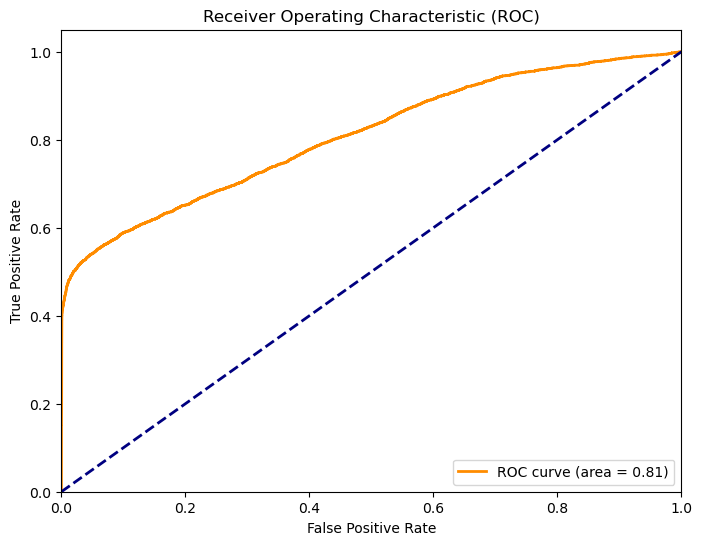

Execution time: 0.2531 seconds


In [34]:

start_time = time.time()


# Plot ROC-AUC curve for the best model
best_model = best_models[best_model_name]
y_proba = best_model.predict_proba(X_test_selected)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

 
end_time = time.time()

execution_time = end_time - start_time
print(f"Execution time: {execution_time:.4f} seconds")


In [35]:

# define the filename, it should have a .pkl extension
filename = 'model_v2.pkl'
# save the model to the current directory
with open(filename, "wb") as f:
    pickle.dump(best_models[best_model_name], f) # replace 'log_reg_model' with the name of your model variable


### Assessment Evaluation

This is required for the assessment to be marked. Groups should specify any data processing steps that are required to run the model in the cell below. This may include the installation of additional libraries, loading of the data, and any additional processing steps required to run the model. The model should be saved to a file called 'model.pkl' in the same directory as the notebook. The model file should be loaded and tested in the cell below to ensure it runs correctly. The model should be loaded and tested using the following code:

In [ ]:
## Do not delete this cell ##

# load the evaluation data


import time
from datetime import datetime, timedelta
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns 

# Display settings  
%matplotlib inline  
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  

# Scikit-learn modules  
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  
from sklearn.metrics import (classification_report, accuracy_score, precision_score,  
                             recall_score, f1_score, roc_auc_score, roc_curve)  

# Machine learning models  
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  
from xgboost import XGBClassifier  
from lightgbm import LGBMClassifier  
from scipy import stats
from sklearn.metrics import roc_curve, auc

# Imbalanced data handling  
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# Utilities  
import pickle  
import warnings  
import random

# Suppress warnings  
warnings.filterwarnings("ignore", category=DeprecationWarning)  
warnings.filterwarnings("ignore", category=FutureWarning)  
warnings.filterwarnings("ignore", category=UserWarning)  


# load the raw data
df_eval_raw = pd.read_csv('evaluation_dataset.csv')


In [ ]:

# groups should add the necessary preprocessing steps to prepare the data for evaluation below 

# the final dataset should be saved in a DataFrame called df_eval

df_eval = df_eval_raw

# Pre-processing steps
# Handling missing values
for col in df_eval.columns:
    if df_eval[col].isnull().sum() > 0:
        if df_eval[col].dtype.name in ['float64', 'int64']:
            df_eval[col].fillna(df_eval[col].median(), inplace=True)
        else:
            df_eval[col].fillna(df_eval[col].mode()[0], inplace=True)

#one-hot encoding
categorical_cols = ['source', 'browser', 'Payment.Method', 'Product.Category', 'Device.Used']## Encoding: One-hot encode the categorical variables


# Standardize column names to ensure consistency in naming conventions

df_eval.columns = df_eval.columns.str.replace(" ", "_")  
# Data cleaning
df_eval = df_eval[df_eval['Transaction.Amount'] >= 0]
df_eval = df_eval[df_eval['Customer.Age'].between(1, 100)]  # Assuming valid ages are 1-100
df_eval = df_eval[df_eval['Quantity'] > 0]  # Ensure quantity is positive


# Feature engineering 

# Extracting date-related features
df_eval['Transaction.Date'] = pd.to_datetime(df_eval['Transaction.Date'],                                            
                                                 errors='coerce', 
                                                 infer_datetime_format=True)
df_eval['Transaction.Month'] = df_eval['Transaction.Date'].dt.month


#dropping date column : not required as a feature
df_eval= df_eval.drop('Transaction.Date', axis=1)


df_eval = pd.get_dummies(df_eval, columns=categorical_cols, drop_first=True)
df_eval.columns = df_eval.columns.str.strip()  # Trim leading/trailing spaces
df_eval.columns = df_eval.columns.str.lower()  # Convert column names to lowercase
df_eval.columns = df_eval.columns.str.replace(" ", "_")  # Replace spaces with underscores



In [ ]:

## Do not delete this cell ##
filename = 'model_v2.pkl'
# Load the model and evaluate it on the evaluation data 

# load the pickle model
with open(filename, "rb") as f:
    eval_model = pickle.load(f) # do not change the name of the model variable

# For LightGBM model
model_columns = eval_model.feature_name_

# Reorder columns to match the model's feature order
df_eval = df_eval[model_columns + ['is.fraudulent']]

# test the model on the evaluation data
y_eval = eval_model.predict(df_eval.drop('is.fraudulent', axis=1))

# calculate the f1 score
f1_eval = f1_score(df_eval['is.fraudulent'], y_eval)

# print the f1 score
print(f'F1 Score: {f1_eval:.3f}')


# Compute ROC AUC curve


fpr, tpr, thresholds = roc_curve(df_eval['is.fraudulent'], y_eval)
roc_auc = roc_auc_score(df_eval['is.fraudulent'], y_eval)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()